**Etude préalable des données**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Affichage de l'aperçu des données

In [ ]:

data = pd.read_csv('/content/BankChurners.csv')

print(data.head())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

Vérification des valeurs manquantes

In [ ]:

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


**Analyse de la corrélation entre les variables numériques**

<ipython-input-74-212e500477be>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


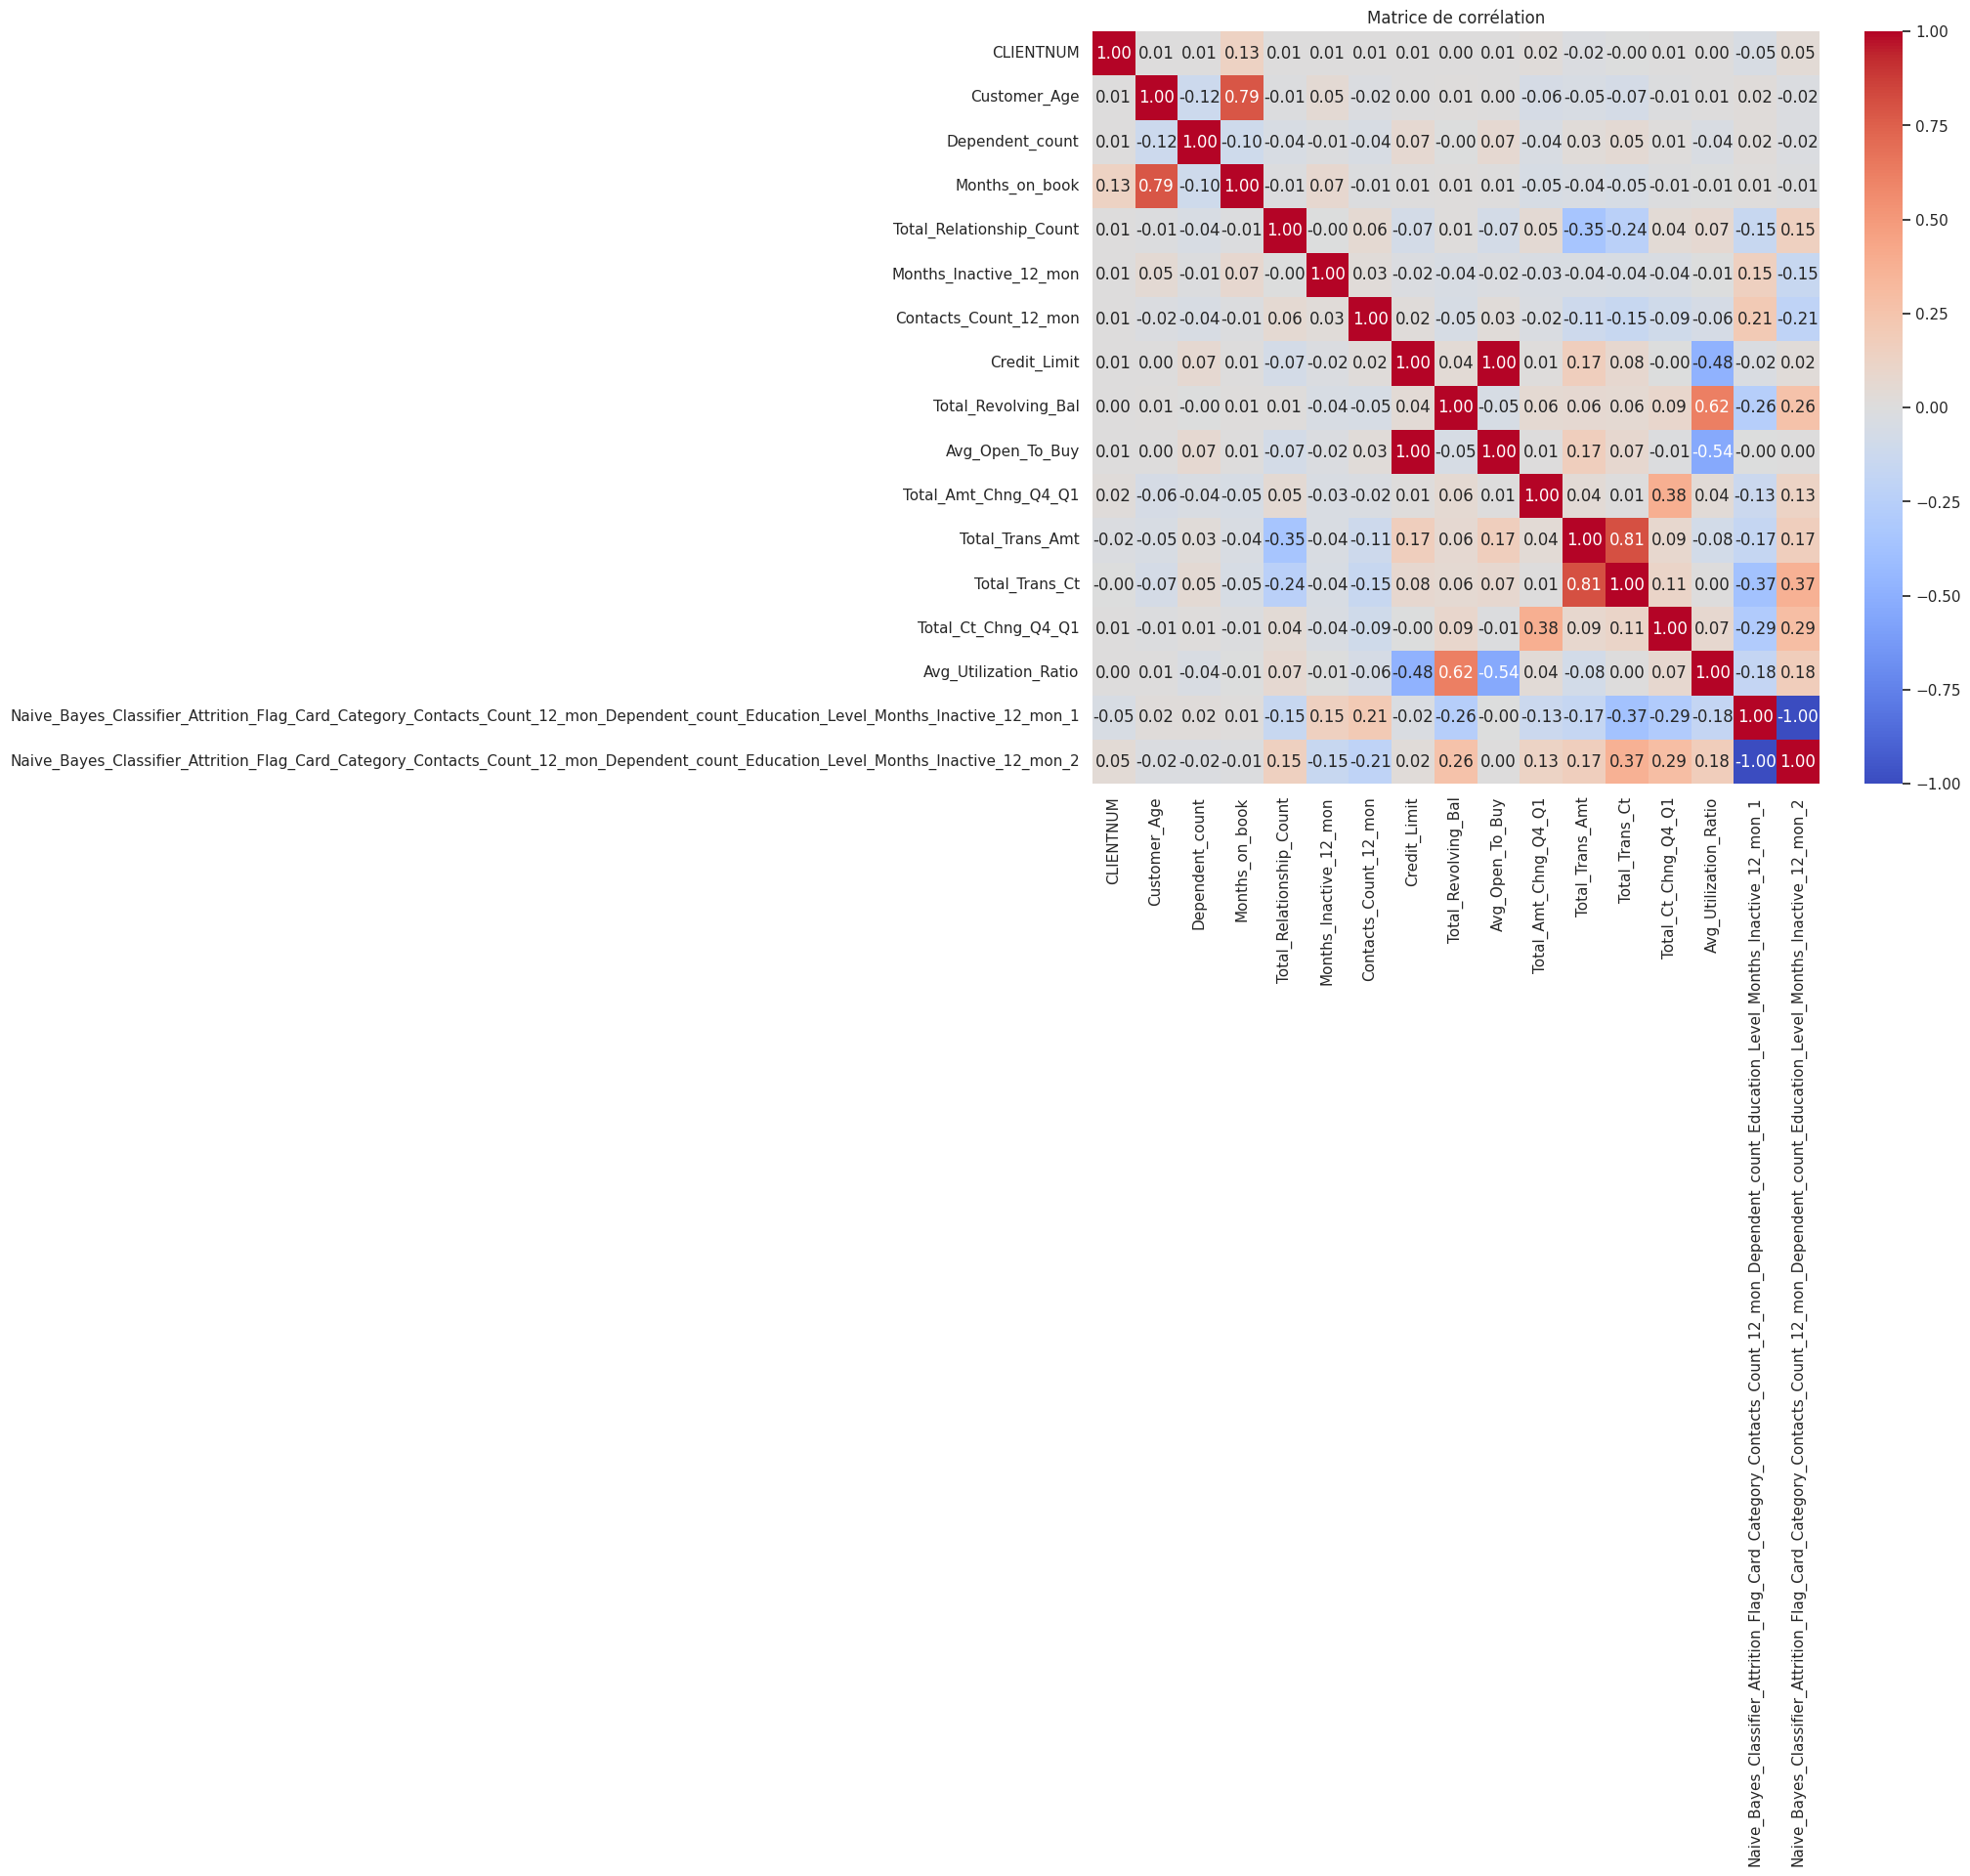

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/BankChurners.csv')
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

**Analyse de la variable cible Attrition_Flag**
Compter le nombre de valeurs pour chaque catégorie et Visualiser la distribution de la variable cible

---



Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


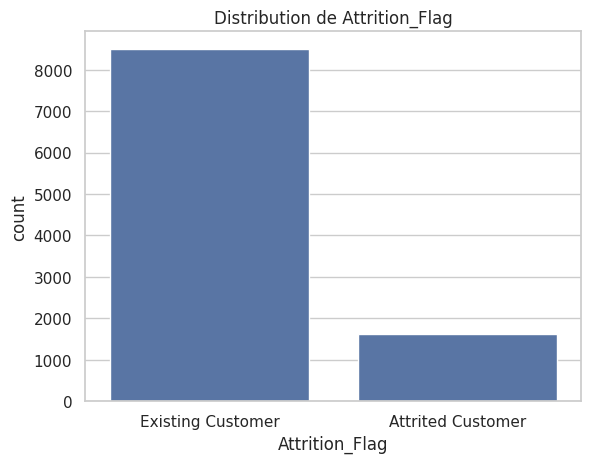

In [ ]:

print(data['Attrition_Flag'].value_counts())

sns.countplot(x='Attrition_Flag', data=data)
plt.title('Distribution de Attrition_Flag')
plt.show()


**Analyse des distributions de la valeur numérique**

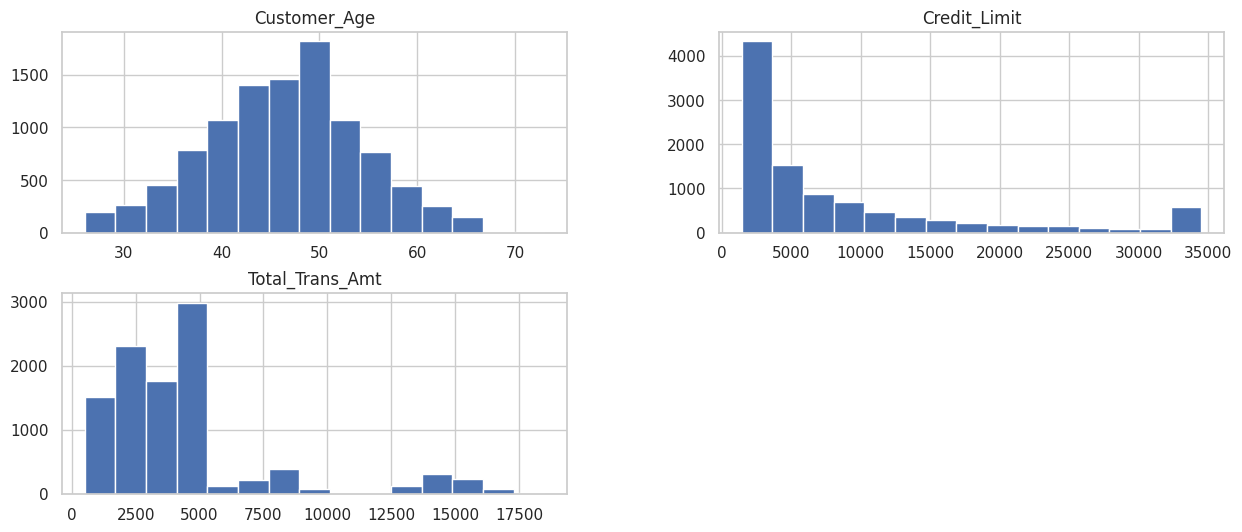

In [ ]:
num_vars = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']
data[num_vars].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

**Analyse des relations entre variables**

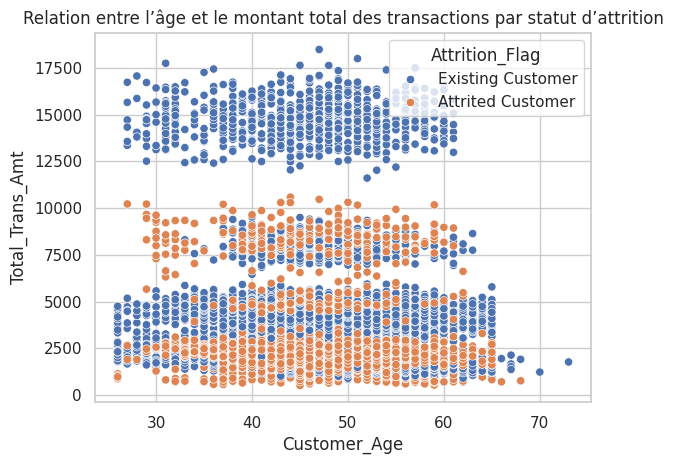

In [ ]:
sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Attrition_Flag', data=data)
plt.title('Relation entre l’âge et le montant total des transactions par statut d’attrition')
plt.show()

**Analyse de la distribution des variables catégorielles**
Pour comprendre la répartition des variables catégorielles telles que le genre (Gender), le niveau d'éducation (Education_Level), et le statut marital (Marital_Status)et visualiser le nombre de clients dans chaque catégories

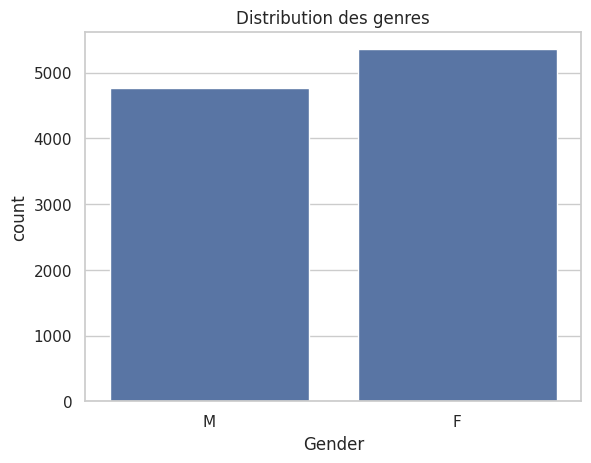

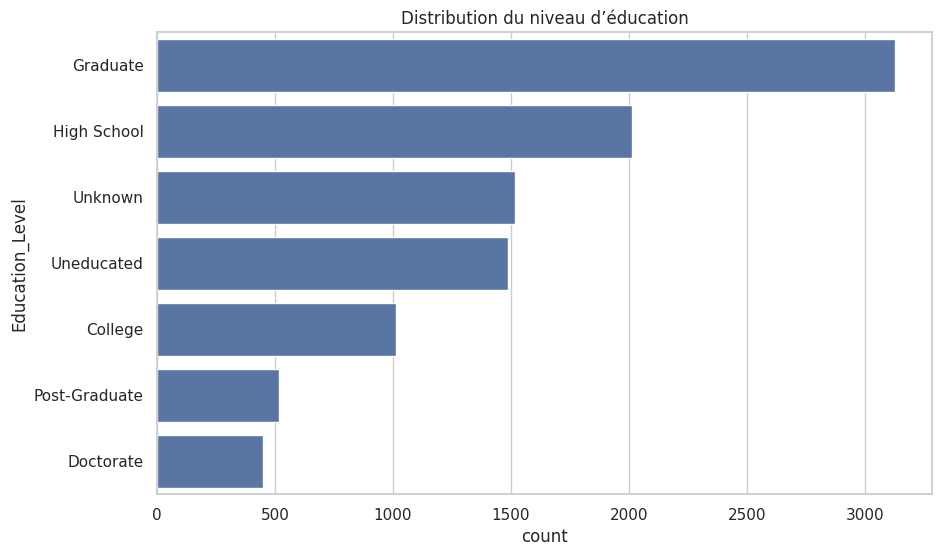

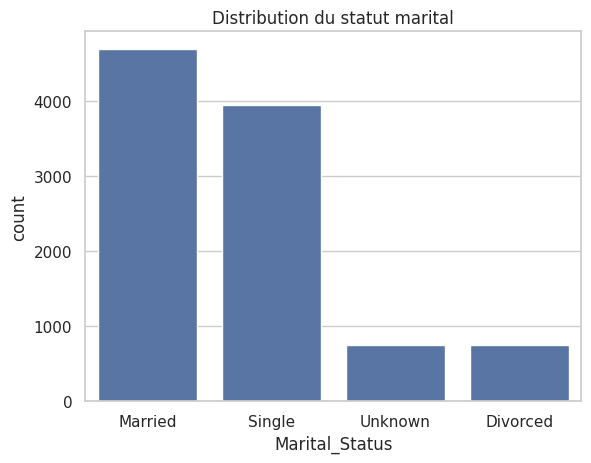

In [ ]:
sns.countplot(x='Gender', data=data)
plt.title('Distribution des genres')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(y='Education_Level', data=data, order = data['Education_Level'].value_counts().index)
plt.title('Distribution du niveau d’éducation')
plt.show()


sns.countplot(x='Marital_Status', data=data)
plt.title('Distribution du statut marital')
plt.show()


**Examiner la distribution d'une variable numérique en fonction d'une variable catégorielle**.Pour voir comment le montant total des transactions varie avec le niveau d'éducation

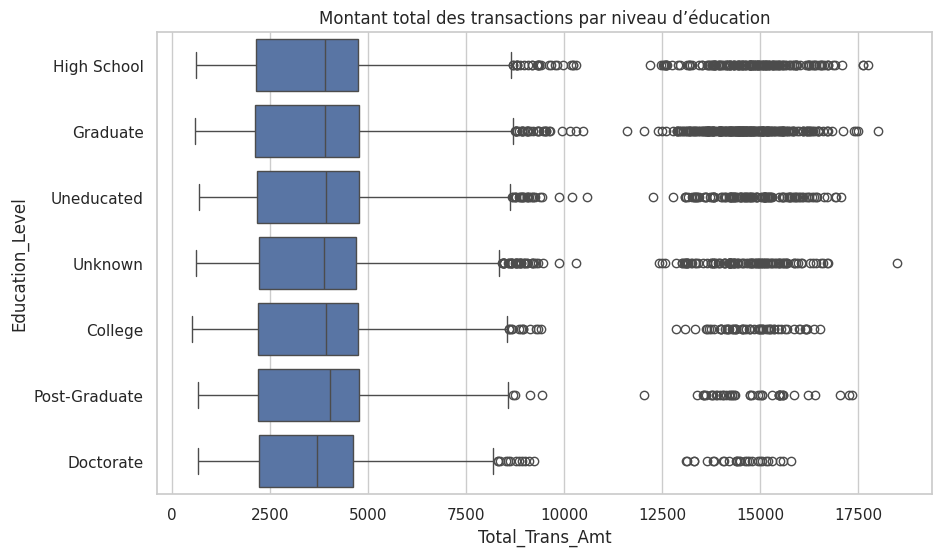

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Education_Level', x='Total_Trans_Amt', data=data)
plt.title('Montant total des transactions par niveau d’éducation')
plt.show()



**Analyse de densité conditionnelle**
Pour voir la distribution d'une variable numérique, telle que l'âge des clients, conditionnée par une variable catégorielle, comme le fait d'être un client existant ou ayant quitté la banque

<ipython-input-80-c381cf801917>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Customer_Age', hue='Attrition_Flag', shade=True)


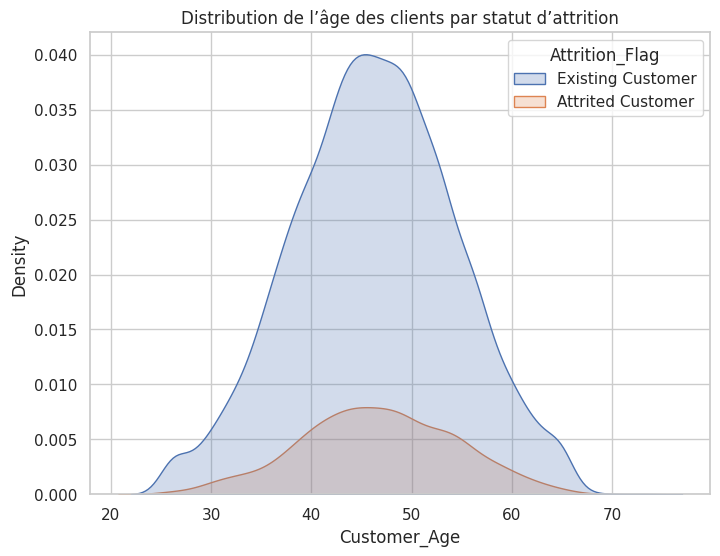

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Customer_Age', hue='Attrition_Flag', shade=True)
plt.title('Distribution de l’âge des clients par statut d’attrition')
plt.show()


Exploration plus approfondie des relations entre variables avec les graphiques de corrélation conditionnelle.

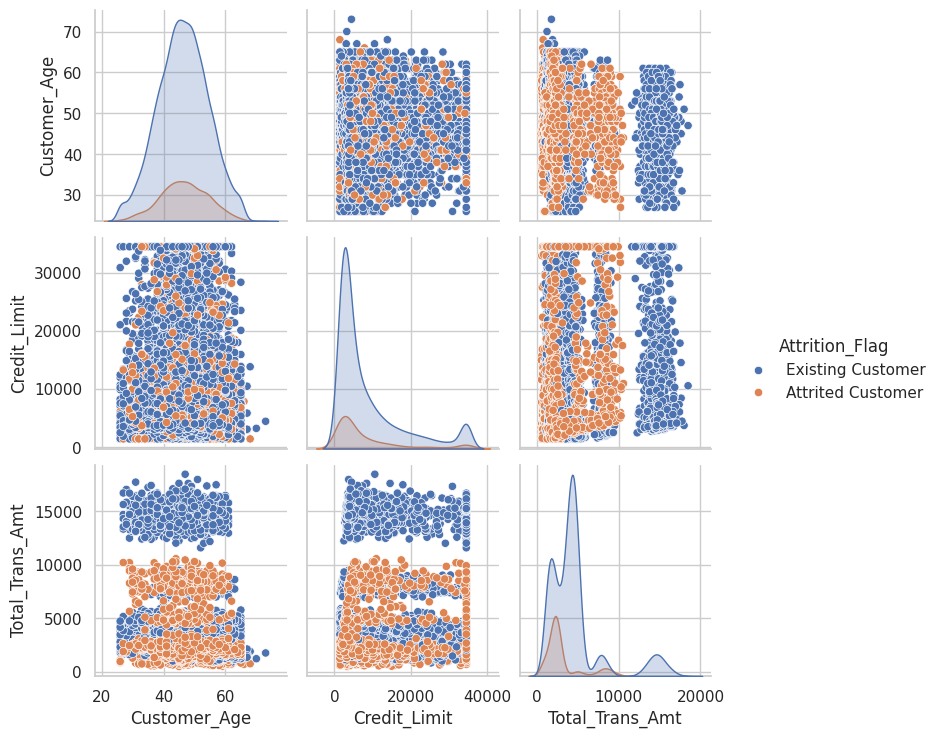

In [ ]:
# Corrélation conditionnelle avec pairplot pour un sous-ensemble de variables
sns.pairplot(data[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Attrition_Flag']], hue='Attrition_Flag')
plt.show()


**Suppression des colonnes non pertinentes: **

In [ ]:
import pandas as pd

data = pd.read_csv('/content/BankChurners.csv')

columns_to_drop = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

data.drop(columns=columns_to_drop, inplace=True)

print(data.columns)


Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


**Traitement de l'encodages des variables catogorielles**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Création du transformateur avec OneHotEncoder pour les colonnes catégorielles
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features)
], remainder='passthrough')  # 'remainder='passthrough' conserve les autres colonnes

# le prétraitement
data_transformed = preprocessor.fit_transform(data)

# Le résultat array NumPy
column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_columns = list(column_names) + [col for col in data.columns if col not in categorical_features]

data_encoded = pd.DataFrame(data_transformed, columns=new_columns)


In [ ]:
print(data_encoded.head())

  Gender_F Gender_M Education_Level_College Education_Level_Doctorate  \
0      0.0      1.0                     0.0                       0.0   
1      1.0      0.0                     0.0                       0.0   
2      0.0      1.0                     0.0                       0.0   
3      1.0      0.0                     0.0                       0.0   
4      0.0      1.0                     0.0                       0.0   

  Education_Level_Graduate Education_Level_High School  \
0                      0.0                         1.0   
1                      1.0                         0.0   
2                      1.0                         0.0   
3                      0.0                         1.0   
4                      0.0                         0.0   

  Education_Level_Post-Graduate Education_Level_Uneducated  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                         

** prétraitement des données, l'entraînement d'un modèle de régression logistique et son évaluation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


data = pd.read_csv('/content/BankChurners.csv')

data = data.drop(['CLIENTNUM'], axis=1)

# Définir les caractéristiques et la variable cible
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Identification des caractéristiques catégorielles et numériques
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Préprocesseur pour les transformations des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Création du pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

#séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ajustement du pipeline sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

Accuracy Score: 1.0


**Optimisation des Hyperparamètres avec Grid Search**
Ajustement des hyperparamètres tels que le paramètre de régularisation C.

In [ ]:
from sklearn.model_selection import GridSearchCV# Paramètres à tester
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}

#Config de la Grid Search avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

#Exécution de la Grid Search sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)


print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score de validation croisée (accuracy):", grid_search.best_score_)


Meilleurs paramètres: {'classifier__C': 0.01}
Meilleur score de validation croisée (accuracy): 1.0


In [ ]:
!pip install matplotlib seaborn


**Matrice de confusion**

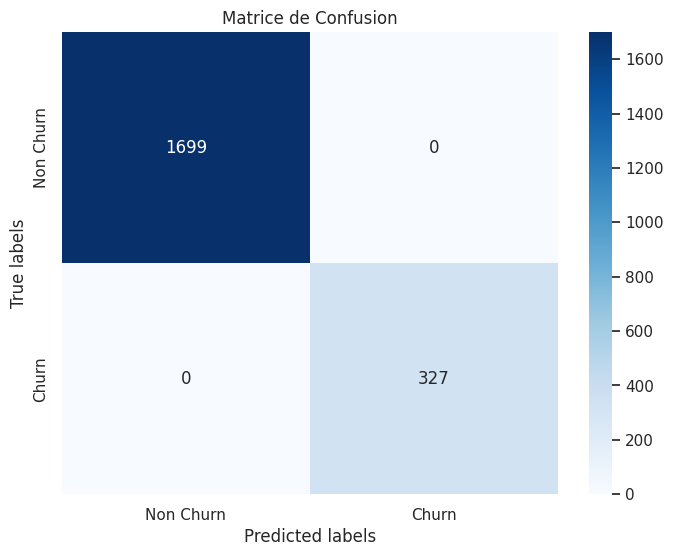

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non Churn', 'Churn'], yticklabels=['Non Churn', 'Churn'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matrice de Confusion')
plt.show()




**OPTIMISATION avec réduction de la dimenssion avec PCA**

In [ ]:
from sklearn.decomposition import PCA

# Ajout de PCA au pipeline avec 95% de la variance
pipeline_pca = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Entrainement et éval de ce nouveau pipeline
pipeline_pca.fit(X_train, y_train)
y_pred_pca = pipeline_pca.predict(X_test)
print(classification_report(y_test, y_pred_pca))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



**OPTIMISATION avec utilisation du Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Modif du pipeline pour intégrer le Gradient Boosting
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

#Entraînement du modèle Gradient Boosting
pipeline_gb.fit(X_train, y_train)

# Prédiction et éval sur l'ensemble de test
y_pred_gb = pipeline_gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



**Optimisation des Hyperparamètres  avec GridSearchCV **

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Définir le prétraitement
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Création du pipelin
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Configuration de la Grid Search (pour espace de recherche réduit)
param_grid = {
    'classifier__n_estimators': [100],  # Nombre réduit d'arbres
    'classifier__learning_rate': [0.1],  # Taux d'apprentissage commun
    'classifier__max_depth': [3, 5]  # Profondeurs moins varié
}

#Utilisation de moins de plis pour la validation croisée pour accélérer le processus
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Entraînement et optimisation
grid_search.fit(X_train, y_train)


print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score de validation croisée:", grid_search.best_score_)


Meilleurs paramètres: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Meilleur score de validation croisée: 1.0
